Files already downloaded and verified


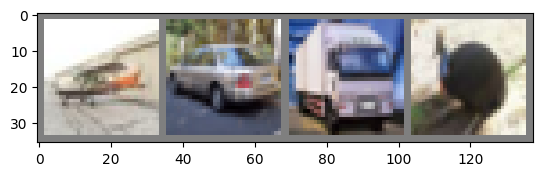

plane car truck bird


In [1]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Define transformations for the dataset (normalize and convert to tensor)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize between -1 and 1
])

# Step 2: Load the CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Step 3: Create a DataLoader for easy batch processing
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# Step 4: Define the classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Step 5: Visualize some images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

In [2]:
import torch
import torch.nn as nn

# Define the PatchEmbedding class
class PatchEmbedding(nn.Module):
    def __init__(self, img_size=32, patch_size=4, in_channels=3, embed_dim=64):
        super(PatchEmbedding, self).__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2

        # Linear layer to convert each patch to an embedding
        self.projection = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        # x: [batch_size, channels, height, width]
        batch_size = x.shape[0]
        x = self.projection(x)  # [batch_size, embed_dim, num_patches_height, num_patches_width]
        print ("After projection", x.shape)
        x = x.flatten(2)        # Flatten height and width into one dimension
        print ("After flattening", x.shape)
        x = x.transpose(1, 2)   # [batch_size, num_patches, embed_dim]
        return x

# Test the PatchEmbedding layer
img = torch.randn(8, 3, 32, 32)  # Batch of 8 images, 3 channels, 32x32 pixels
patch_embedding = PatchEmbedding()
output = patch_embedding(img)

print("Patch Embeddings Shape:", output.shape)  # Expected: [8, 64, 64]. 8 images, 64 patches, 64 embed values per patch

After projection torch.Size([8, 64, 8, 8])
After flattening torch.Size([8, 64, 64])
Patch Embeddings Shape: torch.Size([8, 64, 64])


In [12]:
import math

class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, num_patches):
        super(PositionalEncoding, self).__init__()
        # Register a buffer to store positional encoding (not a learnable parameter)
        self.pos_embedding = nn.Parameter(torch.zeros(1, num_patches, embed_dim))

        # Initialize the positional encoding with sine-cosine values
        self._init_positional_encoding(num_patches, embed_dim)

    def _init_positional_encoding(self, num_patches, embed_dim):
        position = torch.arange(0, num_patches, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim))
        pos_encoding = torch.zeros(num_patches, embed_dim)
        pos_encoding[:, 0::2] = torch.sin(position * div_term)
        pos_encoding[:, 1::2] = torch.cos(position * div_term)
        self.pos_embedding.data.copy_(pos_encoding.unsqueeze(0))

    def forward(self, x):
        # Add positional encoding to patch embeddings
        return x + self.pos_embedding

# Test the PositionalEncoding layer
embed_dim = 64
num_patches = 64
pos_encoding = PositionalEncoding(embed_dim, num_patches)
patch_embeds = torch.randn(8, num_patches, embed_dim)  # Batch of 8, 64 patches, 64-dim embeddings

output = pos_encoding(patch_embeds)
print("Positional Encoding Shape:", output.shape)  # Expected: [8, 64, 64]

Positional Encoding Shape: torch.Size([8, 64, 64])


In [13]:
import math

class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, num_patches):
        super(PositionalEncoding, self).__init__()
        # Register a buffer to store positional encoding (not a learnable parameter)
        self.pos_embedding = nn.Parameter(torch.zeros(1, num_patches, embed_dim))

        # Initialize the positional encoding with sine-cosine values
        self._init_positional_encoding(num_patches, embed_dim)

    def _init_positional_encoding(self, num_patches, embed_dim):
        position = torch.arange(0, num_patches, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim))
        pos_encoding = torch.zeros(num_patches, embed_dim)
        pos_encoding[:, 0::2] = torch.sin(position * div_term)
        pos_encoding[:, 1::2] = torch.cos(position * div_term)
        self.pos_embedding.data.copy_(pos_encoding.unsqueeze(0))

    def forward(self, x):
        # Add positional encoding to patch embeddings
        return x + self.pos_embedding

# Test the PositionalEncoding layer
embed_dim = 64
num_patches = 64
pos_encoding = PositionalEncoding(embed_dim, num_patches)
patch_embeds = torch.randn(8, num_patches, embed_dim)  # Batch of 8, 64 patches, 64-dim embeddings

output = pos_encoding(patch_embeds)
print("Positional Encoding Shape:", output.shape)  # Expected: [8, 64, 64]

Positional Encoding Shape: torch.Size([8, 64, 64])


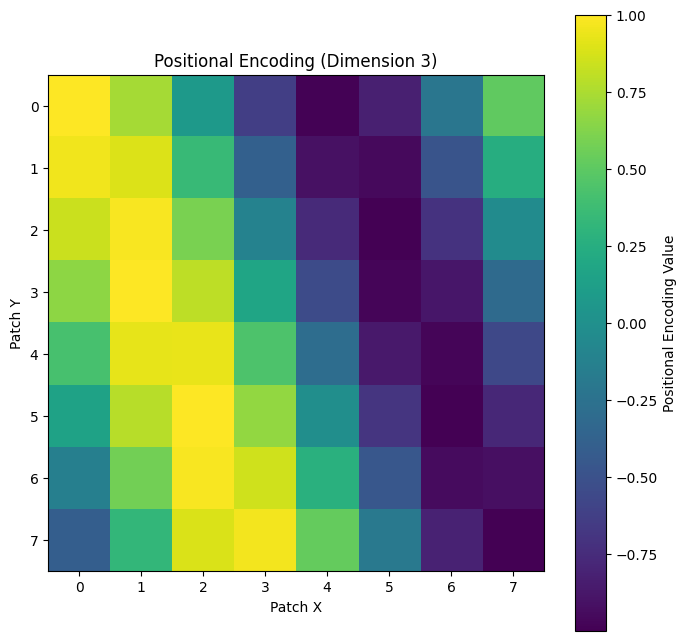

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extract positional encoding values
pos_embedding = pos_encoding.pos_embedding.squeeze(0).detach().cpu().numpy()  # Shape: [num_patches, embed_dim]

# Choose a single dimension to visualize or aggregate across dimensions
dim_to_visualize = 3 # Change this to explore different dimensions
pos_values = pos_embedding[:, dim_to_visualize]  # Shape: [num_patches]

# Reshape to a grid corresponding to the patch layout (assume square grid)
patch_grid_size = int(math.sqrt(num_patches))  # e.g., 64 patches -> 8x8 grid
pos_grid = pos_values.reshape(patch_grid_size, patch_grid_size)

# Plot the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(pos_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Positional Encoding Value")
plt.title(f"Positional Encoding (Dimension {dim_to_visualize})")
plt.xlabel("Patch X")
plt.ylabel("Patch Y")
plt.show()

In [17]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4.0, dropout=0.1):
        super(TransformerEncoderBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Transpose x to [N, B, D]
        x = x.transpose(0, 1)  # Shape becomes [65, 8, 64]
    
        # Multi-Head Self-Attention
        attn_output, attn_weights = self.attn(x, x, x)
        print ("attn_output", attn_weights.shape)
        
        # Transpose attn_output back to [B, N, D]
        attn_output = attn_output.transpose(0, 1)  # Shape becomes [8, 65, 64]
    
        # Add skip connection and layer normalization
        x = x.transpose(0, 1) + self.dropout(attn_output)  # Back to [B, N, D]
        x = self.norm1(x)
    
        # Feed-Forward Network with skip connection
        ffn_output = self.mlp(x)
        x = x + self.dropout(ffn_output)
        x = self.norm2(x)
    
        return x, attn_weights


# Sample input: 8 images, 64+1 patches, 64-dim embeddings
x = torch.randn(8, 65, 64)

# Instantiate the Transformer Encoder Block
encoder_block = TransformerEncoderBlock(embed_dim=64, num_heads=4) # 16 embedding layers per patch.   

# Forward pass
output, attn_weights = encoder_block(x)
print(output.shape, attn_weights.shape)

attn_output torch.Size([8, 65, 65])
torch.Size([8, 65, 64]) torch.Size([8, 65, 65])


In [ ]:
class VisionTransformer(nn.Module):
    def __init__(self, img_size=32, patch_size=4, embed_dim=64, num_heads=4, num_layers=6, num_classes=10, mlp_ratio=4.0, dropout=0.1):
        super().__init__()
        self.patch_embed = nn.Conv2d(
            in_channels=3,
            out_channels=embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )
        num_patches = (img_size // patch_size) ** 2
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.dropout = nn.Dropout(dropout)
        self.transformer = nn.ModuleList(
            [TransformerEncoderBlock(embed_dim, num_heads, mlp_ratio, dropout) for _ in range(num_layers)]
        )
        self.mlp_head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        B = x.size(0)
        # Patch Embedding
        x = self.patch_embed(x)  # [B, embed_dim, H_patch, W_patch]
        x = x.flatten(2).transpose(1, 2)  # [B, Seq_len, Embed_dim]

        # Add class token
        cls_tokens = self.cls_token.expand(B, -1, -1)  # [B, 1, Embed_dim]
        x = torch.cat((cls_tokens, x), dim=1)  # [B, Seq_len+1, Embed_dim]

        # Add position embedding
        x = x + self.pos_embed
        x = self.dropout(x)

        # Pass through transformer blocks
        attn_maps = []  # Collect attention maps
        for block in self.transformer:
            x, attn_weights = block(x)
            attn_maps.append(attn_weights)
        
        # Pass through transformer blocks
        for block in self.transformer:
            x, _ = block(x)  # Only use the updated embeddings

        # Classification head
        cls_output = x[:, 0]  # Take the [CLS] token
        x = self.mlp_head(cls_output)

        return x, attn_maps

In [ ]:
import torchvision

# CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Training Loop
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        # print (images[0])
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

# Evaluation Loop
def evaluate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

    accuracy = 100.0 * correct / total
    return total_loss / len(test_loader), accuracy

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model, optimizer, and loss function
model = VisionTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_attention(attn_weights, img_size, patch_size, layer_idx=0, head_idx=0):
    """
    Visualize attention for a specific head in a specific layer.
    """
    # Extract attention for the specified layer and head
    attn_map = attn_weights[layer_idx][head_idx].detach().cpu().numpy()

    # Average over all patches to see the global pattern
    avg_attn_map = attn_map.mean(axis=0).reshape(img_size // patch_size, img_size // patch_size)

    plt.figure(figsize=(6, 6))
    plt.imshow(avg_attn_map, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Attention Map - Layer {layer_idx}, Head {head_idx}")
    plt.show()

# Example: Forward pass through the model
vit_model = VisionTransformer(img_size=32, patch_size=4, embed_dim=64, num_heads=4, num_layers=6)
input_image = torch.randn(1, 3, 32, 32)  # Example input image
output, attn_maps = vit_model(input_image)

# Visualize attention for Layer 0, Head 0
visualize_attention(attn_maps, img_size=32, patch_size=4, layer_idx=0, head_idx=0)

In [ ]:
import matplotlib.pyplot as plt

def plot_attention_heads(attn_weights, num_heads):
    # Select the first image in the batch and squeeze extra dimensions
    attn_weights = attn_weights.squeeze(0).detach().cpu().numpy()  # Shape: [num_heads, num_patches, num_patches]

    # Plot each head's attention map
    fig, axes = plt.subplots(1, num_heads, figsize=(20, 5))
    for i in range(num_heads):
        ax = axes[i]
        ax.matshow(attn_weights[i], cmap='viridis')
        ax.set_title(f'Head {i+1}')
        ax.axis('off')

    plt.show()

# Plot attention maps
plot_attention_heads(attn_weights, num_heads=4)